<a href="https://colab.research.google.com/github/braveenth/garmin-running-llm/blob/main/Garmin_Running_LLM_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Garmin Running LLM Analysis 🏃
By: Braveenth Rasanayagam

---

The goal of this Jupyter Notebook is to have reuseable code that facilitates the prompting and analysis of your your Garmin-tracked runs by LLMs.

This was built to help train for a half-marathon, and you can use it for your fitness activities.

I solved the context length limitations imposed by various LLM models by splitting the data using even rows, which is a method to reduce the number of data points. I am also considering other mathematical methods of reducing the number of data points.

Please note that I am not responsible or liable for your use of this application. Please use this at your own risk and consult with a health care professional.


## Steps to Use:
Using OpenAI's ChatGPT API:

1.   Obtain an OpenAI API Key here: https://platform.openai.com/api-keys
2.   Add OpenAI API Key as a Colab secret value named 'OPENAI_API_KEY'
3.   Obtain .fit file from Garmin Connect
4.   Upload .fit file to Colab files
5.   Specify path to .fit file in notebook form

## Steps to Contribute:
Submit a pull-request or message me!
MIT License

## Additional Links
*   [runw.ai](https://www.runw.ai/)
*   [Instagram - runw.ai](https://www.instagram.com/runw.ai.run/)


In [4]:
!pip install garmin-fit-sdk
!pip install tiktoken
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.1 MB/s eta 0:00:00


In [5]:
# Lets start by obtaining the path to the .fit file
fit_file = "/content/15240649236_ACTIVITY.fit" # @param {type:"string"}

In [6]:
# This is for when the program runs outside of Colab

import os
from openai import OpenAI
colabEnvironment = False

try:
    # Attempt to import the google.colab module to see if the program is running in Colab.
    from google.colab import userdata
    print("Running on Google Colab")
    colabEnvironment = True
    openai_api_key = userdata.get('OPENAI_API_KEY')
    google_ai_studio_key = userdata.get('AI_STUDIO_KEY')
    client = OpenAI(api_key=openai_api_key)

except ImportError:
    # The ImportError exception will be raised if the google.colab module is not found,
    # indicating that the program is not running inside Google Colab.
    print("Running outside of Google Colab")
    openai_api_key = os.environ['OPENAI_API_KEY']
    google_ai_studio_key = os.environ['AI_STUDIO_KEY']
    client = OpenAI(api_key=openai_api_key)
    fit_file = os.environ.get('FIT_FILE_PATH')

Running on Google Colab


In [7]:
# Lets describe an existing run that I have completed. We will use the fit file from Garmin Connect.
# In the future, we will retrieve this using Garmin's API.
# Lets use the garmin-fit-sdk here

from garmin_fit_sdk import Decoder, Stream

stream = Stream.from_file(fit_file)
decoder = Decoder(stream)
messages, errors = decoder.read()

print(errors)
# print(messages)

[]


In [8]:
file_messages = messages['file_id_mesgs']

duration_of_activity = messages['activity_mesgs'][0]['total_timer_time']
activity_record_messages = messages['record_mesgs']

# for activity_message in activity_record_messages:
#   print(activity_message)
#print(messages['user_profile_mesgs'])
#print(messages['file_id_mesgs'])

# Information about the units
# 'distance' - metres

In [9]:
# Lets get this information into a Pandas Dataframe

import pandas as pd

df = pd.DataFrame(activity_record_messages)
# Lets remove columns that are currently not necessary

df_with_relevant_information = df.drop(['cycle_length16', 'enhanced_speed','fractional_cadence', 135, 136], axis=1)
display(df_with_relevant_information)

,timestamp,distance,enhanced_altitude,heart_rate,cadence,temperature,position_lat,position_long,90
0,2024-05-05 12:46:10+00:00,1.05,175.4,114,0,20,NaN,NaN,NaN
1,2024-05-05 12:46:11+00:00,2.09,175.4,114,0,20,NaN,NaN,NaN
2,2024-05-05 12:46:15+00:00,2.09,175.6,117,0,20,NaN,NaN,NaN
3,2024-05-05 12:46:31+00:00,4.47,175.8,121,79,19,522088767.0,-947398891.0,NaN
4,2024-05-05 12:46:33+00:00,6.85,176.0,121,79,19,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2490,2024-05-05 15:11:47+00:00,21413.16,82.6,163,80,16,520552708.0,-947512683.0,1.0
2491,2024-05-05 15:11:50+00:00,21413.93,82.4,163,79,16,520552755.0,-947512817.0,1.0
2492,2024-05-05 15:11:56+00:00,21419.58,82.6,161,57,16,520553217.0,-947513468.0,1.0
2493,2024-05-05 15:11:58+00:00,21422.35,82.6,160,0,16,520553502.0,-947513579.0,1.0


In [10]:
# Lets use the timestamp to get additional information

df2 = df_with_relevant_information

startDateTime = df.iloc[0]['timestamp']
endDateTime = df.iloc[-1]['timestamp']
print(startDateTime)
print(endDateTime)

time_diff = endDateTime - startDateTime
print(time_diff)
#df2['Time (min)'] = df2['timestamp']
#df2['Pace (min/km)'] = df2['Time (min)'] / df2['Distance (km)']

df2['seconds'] = df['timestamp'].astype('int64') // 1e9

specific_value3 = df2.loc[0, 'seconds']
print(specific_value3)
df2['activity_duration_seconds'] = df2['seconds'] - specific_value3


#display(df2)

df_original = df2.drop(['timestamp', 'seconds'], axis=1)
#display(df3)


2024-05-05 12:46:10+00:00
2024-05-05 15:12:00+00:00
0 days 02:25:50
1714913170.0


In [11]:
# Lets calculate Derivatives here
import numpy as np

# 1. Distance and Speed
#    First Derivative (Velocity)
df_original['velocity'] = np.gradient(df_original['distance'], df_original['activity_duration_seconds'])

#    Second Derivative (Acceleration)
df_original['acceleration'] = np.gradient(df_original['velocity'], df_original['activity_duration_seconds'])


# 2. Heart Rate Dynamics
#    First Derivative
df_original['heart_rate_dynamics'] = np.gradient(df_original['heart_rate'], df_original['activity_duration_seconds'])


# 3. Cadence Variability
#    First Derivative
df_original['cadence_variability'] = np.gradient(df_original['cadence'], df_original['activity_duration_seconds'])


# 4. Temperature Effects
#    First Derivative
df_original['temperature_effects'] = np.gradient(df_original['temperature'], df_original['activity_duration_seconds'])


display(df_original)

,distance,enhanced_altitude,heart_rate,cadence,temperature,position_lat,position_long,90,activity_duration_seconds,velocity,acceleration,heart_rate_dynamics,cadence_variability,temperature_effects
0,1.05,175.4,114,0,20,NaN,NaN,NaN,0.0,1.040000,-0.208000,0.000000,0.000000,0.000000e+00
1,2.09,175.4,114,0,20,NaN,NaN,NaN,1.0,0.832000,-0.206512,0.150000,0.000000,0.000000e+00
2,2.09,175.6,117,0,20,NaN,NaN,NaN,5.0,0.029750,-0.147393,0.650000,0.987500,-1.250000e-02
3,4.47,175.8,121,79,19,522088767.0,-947398891.0,NaN,21.0,1.074306,7.418674,0.027778,0.548611,-6.944444e-03
4,6.85,176.0,121,79,19,NaN,NaN,NaN,23.0,17.750000,5.418924,1.000000,0.250000,2.500000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2490,21413.16,82.6,163,80,16,520552708.0,-947512683.0,1.0,8737.0,1.301667,-0.395556,2.250000,-0.083333,-6.661338e-16
2491,21413.93,82.4,163,79,16,520552755.0,-947512817.0,1.0,8740.0,0.485000,-0.137639,-0.111111,-1.444444,0.000000e+00
2492,21419.58,82.6,161,57,16,520553217.0,-947513468.0,1.0,8746.0,1.274167,-0.056806,-0.458333,-22.291667,0.000000e+00
2493,21422.35,82.6,160,0,16,520553502.0,-947513579.0,1.0,8748.0,1.035000,-0.147292,-0.500000,-14.250000,0.000000e+00


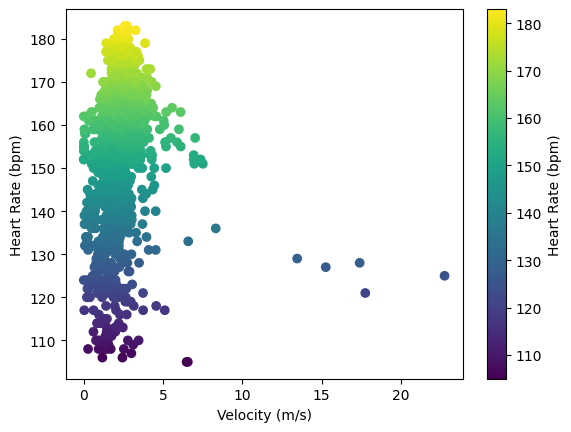

In [12]:
# @title Velocity vs Heart Rate

import matplotlib.pyplot as plt
plt.scatter(df_original['velocity'], df_original['heart_rate'], c=df_original['heart_rate'], cmap='viridis')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Heart Rate (bpm)')
_ = plt.colorbar(label='Heart Rate (bpm)')

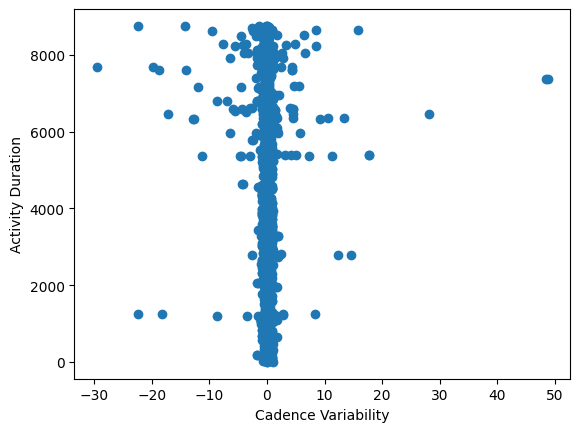

In [13]:
# @title Cadence Variability vs Activity Duration

import matplotlib.pyplot as plt
plt.scatter(df_original['cadence_variability'], df_original['activity_duration_seconds'])
plt.xlabel('Cadence Variability')
_ = plt.ylabel('Activity Duration')

In [14]:
import tiktoken
enc = tiktoken.encoding_for_model("gpt-3.5-turbo-16k")


# Get the Dataframe to a String
df_string = df_original.to_string()
print ("Number of tokens in input prompt ", len(enc.encode(df_string)))

#Lets get the token size to be appropriate
# The iloc operation will allow us to select rows at specified internals.
# If we use iloc[::2], this is a slicing option to include every other row
# starting from the first row.

target_tokens = 14000
df_token_limitation = df_original

while(len(enc.encode(df_token_limitation.to_string())) > target_tokens):
  df_token_limitation = df_token_limitation.iloc[::2]

display(df_token_limitation)

df_reduced_string = df_token_limitation.to_string()
print ("Number of tokens in resized input prompt ", len(enc.encode(df_reduced_string)))

Number of tokens in input prompt  228442


,distance,enhanced_altitude,heart_rate,cadence,temperature,position_lat,position_long,90,activity_duration_seconds,velocity,acceleration,heart_rate_dynamics,cadence_variability,temperature_effects
0,1.05,175.4,114,0,20,NaN,NaN,NaN,0.0,1.040000,-0.208000,0.000000,0.000000,0.000000e+00
16,151.27,176.8,137,79,19,522076456.0,-947407843.0,NaN,46.0,1.714762,0.198988,0.023810,0.023810,1.554312e-15
32,271.63,178.8,152,81,19,522065524.0,-947405512.0,NaN,97.0,2.420833,0.032480,0.166667,0.000000,-6.661338e-16
48,405.23,179.6,154,81,19,522052148.0,-947398668.0,NaN,152.0,2.640333,-0.014198,0.100000,-0.133333,4.440892e-16
64,554.58,178.2,158,81,18,522036400.0,-947393650.0,NaN,211.0,3.007818,0.087739,-0.218182,-0.218182,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2416,20777.80,78.6,155,78,17,520543217.0,-947449957.0,1.0,8460.0,2.664167,-0.038479,0.375000,-0.375000,8.881784e-16
2432,20913.35,77.8,156,76,17,520539805.0,-947469308.0,1.0,8527.0,2.012619,0.008143,0.107143,0.000000,-2.220446e-16
2448,21062.22,77.0,156,78,17,520536458.0,-947490792.0,1.0,8589.0,2.426833,0.002783,-0.283333,0.050000,0.000000e+00
2464,21216.01,77.0,155,78,16,520533340.0,-947513021.0,1.0,8659.0,2.077917,-0.071494,-0.375000,-0.291667,0.000000e+00


Number of tokens in resized input prompt  13462


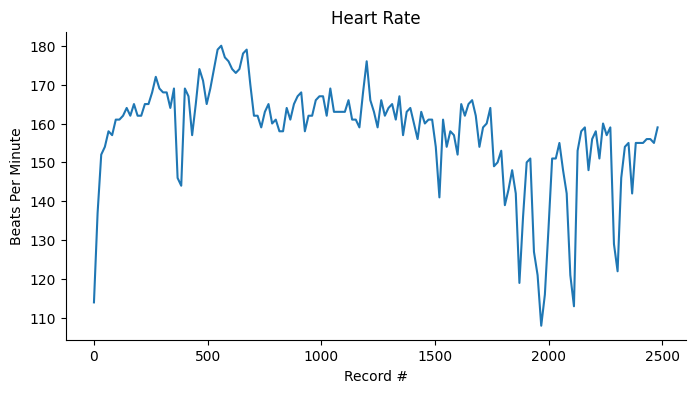

In [15]:
# @title Heart Rate

from matplotlib import pyplot as plt
df_token_limitation['heart_rate'].plot(kind='line', figsize=(8, 4), title='Heart Rate')
plt.xlabel('Record #')
plt.ylabel('Beats Per Minute')
plt.gca().spines[['top', 'right']].set_visible(False)

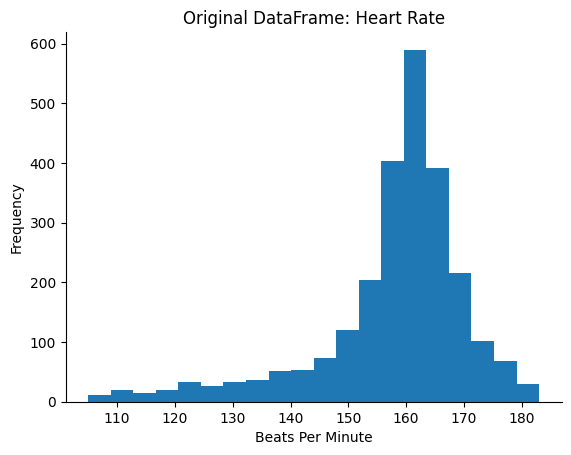

In [16]:
# Visualize Pace from original DF
from matplotlib import pyplot as plt
df['heart_rate'].plot(kind='hist', bins=20, title='Original DataFrame: Heart Rate')
plt.xlabel('Beats Per Minute')
plt.gca().spines[['top', 'right',]].set_visible(False)

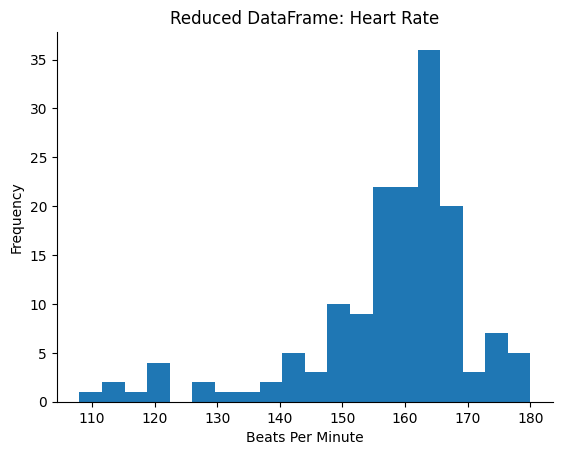

In [17]:
# Visualize Heart Rate Data from the reduced DF
df_token_limitation['heart_rate'].plot(kind='hist', bins=20, title='Reduced DataFrame: Heart Rate')
plt.xlabel('Beats Per Minute')
plt.gca().spines[['top', 'right',]].set_visible(False)

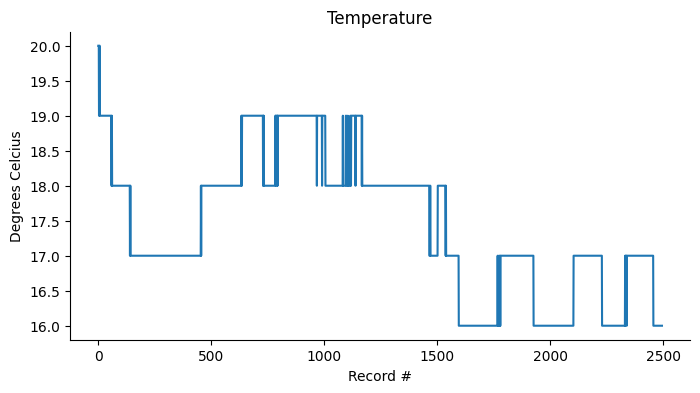

In [18]:
# @title Temperature Over Time Original Dataframe

from matplotlib import pyplot as plt
df['temperature'].plot(kind='line', figsize=(8, 4), title='Temperature')
plt.xlabel('Record #')
plt.ylabel('Degrees Celcius')
plt.gca().spines[['top', 'right']].set_visible(False)

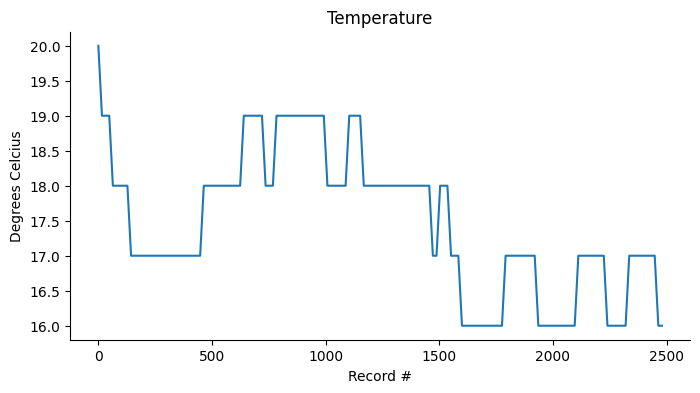

In [19]:
# @title Temperature Over Time Reduced Dataframe

from matplotlib import pyplot as plt
df_token_limitation['temperature'].plot(kind='line', figsize=(8, 4), title='Temperature')
plt.xlabel('Record #')
plt.ylabel('Degrees Celcius')
plt.gca().spines[['top', 'right']].set_visible(False)

In [20]:
df_for_llm = df_token_limitation

from openai import OpenAI

try:
    # Attempt to import the google.colab module to see if the program is running in Colab.
    from google.colab import userdata
    print("Running on Google Colab")
    client = OpenAI(api_key=userdata.get('OPENAI_API_KEY'))

except ImportError:
    # The ImportError exception will be raised if the google.colab module is not found,
    # indicating that the program is not running inside Google Colab.
    import os
    print("Running outside of Google Colab")
    openai_api_key = os.environ['OPENAI_API_KEY']
    client = OpenAI(api_key=openai_api_key)

import tiktoken
enc = tiktoken.encoding_for_model("gpt-3.5-turbo-16k")

# Get the Dataframe to a String
df_string = df_for_llm.to_string()
print ("Number of tokens in input prompt ", len(enc.encode(df_string)))


Running on Google Colab
Number of tokens in input prompt  13462


In [21]:
# Manual Calculations using Math

#1. Distance in kilometers
#2. Time in hours:minutes
#3. Average Pace in minutes/km

activity_distance_metres = df_for_llm['distance'].max()
activity_distance_kilometers = activity_distance_metres / 1000
activity_time_seconds = df_for_llm['activity_duration_seconds'].max()
activity_time_minutes = activity_time_seconds / 60
activity_pace = activity_time_minutes /activity_distance_kilometers

print(activity_distance_kilometers)
print(activity_time_minutes)
print(activity_pace)

21.31339
145.05
6.805580904773948


In [22]:
# Feedback per KM
# Calculate average pace for the KM interval

range_min = 0
range_max = 1000
# Boolean indexing
import datetime

def to_unix_timestamp(date_time):
    return int(date_time.timestamp() * 1000)

per_km_df = df[(df_original['distance'] >= range_min) & (df_original['distance'] <= range_max)]

# Getting the index values
index_values = per_km_df.index

print(index_values)

per_km_distance_metres = per_km_df['distance'].max()
per_km_distance_kilometers = per_km_distance_metres / 1000
display(per_km_df)
per_km_time_seconds = per_km_df['timestamp'].max()
#per_km_time_minutes = to_unix_timestamp(per_km_time_seconds) / 60
per_km_time_seconds =  (to_unix_timestamp(per_km_df.iloc[-1]['timestamp']) - to_unix_timestamp(per_km_df.iloc[0]['timestamp'])) / 1000
per_km_time_minutes = per_km_time_seconds / 60
per_km_pace = per_km_time_minutes /per_km_distance_kilometers

print(per_km_distance_kilometers)
print(per_km_time_seconds)
print(per_km_time_minutes)

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106],
      dtype='int64', length=107)


,timestamp,distance,enhanced_speed,enhanced_altitude,cycle_length16,heart_rate,cadence,temperature,fractional_cadence,135,136,position_lat,position_long,90
0,2024-05-05 12:46:10+00:00,1.05,1.045,175.4,0.0,114,0,20,0.0,176,114,NaN,NaN,NaN
1,2024-05-05 12:46:11+00:00,2.09,1.045,175.4,0.0,114,0,20,0.0,176,114,NaN,NaN,NaN
2,2024-05-05 12:46:15+00:00,2.09,0.000,175.6,0.0,117,0,20,0.0,176,117,NaN,NaN,NaN
3,2024-05-05 12:46:31+00:00,4.47,2.379,175.8,0.0,121,79,19,0.5,176,121,522088767.0,-947398891.0,NaN
4,2024-05-05 12:46:33+00:00,6.85,2.379,176.0,0.0,121,79,19,0.5,176,121,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,2024-05-05 12:51:54+00:00,926.95,2.753,169.6,0.0,160,80,18,0.5,176,160,NaN,NaN,NaN
103,2024-05-05 12:52:00+00:00,943.60,2.734,169.4,0.0,160,83,18,0.5,176,160,NaN,NaN,NaN
104,2024-05-05 12:52:06+00:00,959.76,2.771,169.4,0.0,160,82,18,0.5,176,160,NaN,NaN,NaN
105,2024-05-05 12:52:12+00:00,978.11,3.872,169.4,0.0,159,81,18,0.0,176,159,NaN,NaN,NaN


0.98199
363.0
6.05


In [23]:
instructPrompt = f"""
You are an expert running coach and you are able to summarize running workout data that was captured from a Garmin wearable device. The 'distance' is in metres.
You will provide 5 key takeaways for the treadmill running data that is provided, ordered as a list from 1 to 5.
You will also provide recommendations and affirmations on how to get better at these running workouts.
Please summarize the dataset that is represented as a string from a Pandas DataFrame.
You will also provide the following information as a table:
1. Distance in kilometers
2. Time in hours:minutes
3. Average Pace in minutes/km

From performing calculations, we already know the following:
1. Distance in kilometers is {activity_distance_kilometers}
2. Time in minutes is {activity_distance_kilometers}
3. Average Pace in minutes/km is {activity_pace}

Use this information to calibrate yourself.

The dataset is provided below. Also state if this person will be able to run across Canada."""

request = instructPrompt + df_string

In [24]:
chatOutput = client.chat.completions.create(model="gpt-4-0125-preview",
                                            messages=[{"role": "system", "content": "You are a running coach."},
                                                      {"role": "user", "content": request}
                                                      ]
                                            )

In [25]:
!pip install google-generativeai

from pathlib import Path
import hashlib
import google.generativeai as genai


genai.configure(api_key=google_ai_studio_key)

# Set up the model
generation_config = {
  "temperature": 1,
  "top_p": 0.95,
  "top_k": 0,
  "max_output_tokens": 8192,
}

safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
]

model = genai.GenerativeModel(model_name="gemini-1.5-pro-latest",
                              generation_config=generation_config,
                              safety_settings=safety_settings)

uploaded_files = []
# def upload_if_needed(pathname: str) -> list[str]:
#   path = Path(pathname)
#   hash_id = hashlib.sha256(path.read_bytes()).hexdigest()
#   try:
#     existing_file = genai.get_file(name=hash_id)
#     return [existing_file]
#   except:
#     pass
#   uploaded_files.append(genai.upload_file(path=path, display_name=hash_id))
#   return [uploaded_files[-1]]

prompt_parts = [
  instructPrompt,
  df_string,
]

response = model.generate_content(prompt_parts)
print(response.text)
for uploaded_file in uploaded_files:
  genai.delete_file(name=uploaded_file.name)

## Running Data Summary and Recommendations:

This dataset captures a 21.3 kilometer treadmill run completed in 1 hour and 37 minutes. Let's break down five key takeaways:

1. **Consistent Pace:** The runner maintained a steady pace throughout the run, averaging 6:50 per kilometer. This indicates good pacing strategy and endurance.

2. **Elevated Heart Rate:** The average heart rate during the run was elevated, reaching above 160 bpm for a significant portion. While this may be within an individual's target heart rate zone, it's worth monitoring and potentially incorporating heart rate training to optimize performance.

3. **Variable Cadence:** The runner exhibited some variability in cadence, particularly in the later stages of the run. Maintaining a consistent cadence can improve efficiency and reduce fatigue.

4. **Terrain Simulation:** Although a treadmill run, the data suggests some variation in simulated incline, as evidenced by the "enhanced_altitude" readings. Incorporating inc

In [26]:
runningSummary = chatOutput.choices[0].message.content
print(runningSummary)

### Summary of Treadmill Running Data

#### Key Takeaways:

1. **Progressive Distance Increase:** The runner has progressively increased their distance throughout the sessions, starting from relatively short distances to reaching over a total of 21 kilometers. This indicates a long-duration workout or a preparation for a half-marathon.

2. **Variable Intensity:** Judging by the variation in velocity and acceleration metrics throughout the session, the runner has incorporated intervals of different intensity levels. This helps improve both aerobic and anaerobic capabilities.

3. **Heart Rate Dynamics:** The heart rate data suggests the runner stayed within a moderate to high-intensity zone for most of the run, which is beneficial for cardiovascular health and endurance building. Peaks in heart rate coincide with increased velocity, indicating effective interval training.

4. **Stable Cadence With Variability:** The cadence mostly remained consistent, with occasional variations. Maintain

In [27]:
instructPromptForMetrics = f"""

You are an expert running coach and you are able to summarize running workout data that was captured from a Garmin wearable device. The 'distance' is in metres.
Please obtain the following information from the dataset that is represented as a string from a Pandas DataFrame. Some of the values have already been calculated, and are accurate:

1. Distance in kilometers, which we know is {activity_distance_kilometers}
2. Average Pace in minutes/km, which we know is {activity_pace}
3. Heart Rate, which is 'heart_rate' in the DataFrame. We know the average is {df_for_llm['heart_rate'].mean()}
4. Maximum Heart Rate, which is 'heart_rate' in the DataFrame. We know the average is {df_for_llm['heart_rate'].max()} beats per minute.
5. Elevation Gain in metres if it exist.
6. Temperature in degrees celcius, which we know the average is {df_for_llm['temperature'].mean()}
7. Maximum Temperature in degrees celcius, which we know the average is {df_for_llm['temperature'].max()}

You will return this as an ordered as a list from 1 to 5. Only provide the summarized information.

The dataset is provided below"""

requestForMetrics = df_string + instructPromptForMetrics

In [28]:
chatOutputForMetrics = client.chat.completions.create(model="gpt-4-0125-preview",
                                            messages=[{"role": "system", "content": "You are a helpful assistant."},
                                                      {"role": "user", "content": requestForMetrics}
                                                      ]
                                            )

In [29]:
metricsSummary = chatOutputForMetrics.choices[0].message.content
print(metricsSummary)

Based on the information provided from the dataset and the calculated summaries, here is the ordered list of summarized information:

1. Distance in kilometers: **21.31339 km**
2. Average Pace: **6.805580904773948 minutes/km**
3. Average Heart Rate: **157.59615384615384 bpm**
4. Maximum Heart Rate: **180 bpm** (Clarification needed: The text states "the average is 180 beats per minute," which seems to be a typo. Assuming it's the maximum heart rate based on context.)
5. Elevation Gain: The dataset provides 'enhanced_altitude' values, but an explicit total elevation gain calculation is not provided here.
6. Average Temperature: **17.46794871794872 degrees Celsius**
7. Maximum Temperature: **20 degrees Celsius**

Please note, the elevation gain (point 5) requires additional calculation or clarification as it is not directly stated in the summary above. The values for each provided point are according to the summaries known from the dataset.


In [30]:
# Podcast title: "Running with Resilience"
instructPromptForAudio = """
Given metrics from a recent run, generate a 1-minute long podcast script. The title of the podcast is 'Running with Resilience.'
Your name is Terry, and you are an expert running coach. Provide an enthusiastic and motivational analysis of their performance, focusing on distance, pace, heart rate, and elevation gain. Include personalized affirmations and encouragement, emphasizing improvement and resilience. Keep the tone optimistic, supportive, and empowering, making the user feel celebrated for their achievements and motivated to continue their running journey."

Instructions:

1. Begin with a Warm Welcome: Start the podcast by greeting the listener and introducing yourself as their running coach. Express excitement about sharing their recent run achievements.
2. Analyze Performance Metrics:
    2.1. Distance: Commend the user on the distance covered, relating it to their dedication and progress.
    2.2. Pace: Reflect on the importance of consistency in pace, encouraging the user to keep moving forward at their own rhythm.
    2.3. Heart Rate: Highlight the effort shown by the heart rate data, connecting physical health to mental resilience.
    2.4. Elevation Gain: Use elevation gain to discuss overcoming challenges, likening hills to life's obstacles that the user is capable of conquering.
3. Incorporate Affirmations: Throughout the analysis, weave in affirmations such as "You are strong", "You are resilient", and "Every step is a victory". Encourage the listener to repeat these affirmations to foster a positive mindset.
4. Conclude with Motivational Encouragement: End the podcast by summarizing the user's achievements, reinforcing their potential for growth, and motivating them to continue their running journey. Encourage them to look forward to their next run with optimism and determination.
5. Keep It Brief and Engaging: Ensure the script is concise enough to fit into a 1-minute segment while being engaging and motivational.
6. Make it one entire transcript with only 1 host speaking. You will only provide what the host will say, and nothing else.
7. Do not use [User's average pace] or any variable names in brackets. Use actual metrics instead of placeholders.
Output Format:

A script suitable for a 1-minute podcast segment, formatted with clear sections for the introduction, analysis of each metric, affirmations, and a motivational conclusion.

The dataset is provided below"""

requestForAudio = metricsSummary + instructPromptForAudio

In [31]:
chatOutputForAudio = client.chat.completions.create(model="gpt-4",
                                            messages=[{"role": "system", "content": "You are a helpful assistant."},
                                                      {"role": "user", "content": requestForAudio}
                                                      ]
                                            )

In [32]:
runningSummaryForAudio = chatOutputForAudio.choices[0].message.content
print(runningSummaryForAudio)

[Introduction]

"Hello, Resilient Runners! This is your running coach, Terry, and welcome back to our 'Running with Resilience' podcast. I'm thrilled to share some jaw-dropping achievements from your recent run. Let's dive right in!

[Distance]
First off, let's celebrate your incredible distance of 21.3 kilometers - that's just over a half marathon! This shows your dedication and progress. Remember, every step you take is not just a physical act, but a declaration that you can and will keep going.

[Pace]
Your average pace was 6.8 minutes per kilometer, beautifully showcasing your consistency. You maintain your rhythm and that's one of the keys to longevity in running. 

[Heart Rate]
Your heart pounded at an average of 158 beats per minute and reached a high of 180 bpm. Those numbers don't just translate to calories burned, they speak volumes about your physical health and mental resilience!

[Elevation Gain]
I know we don't have the specifics for elevation gain but every hill climbed 

In [35]:
import re

def remove_text_inside_brackets(text):
    # This pattern matches anything inside square brackets, including the brackets themselves.
    # It accounts for nested brackets as well.
    pattern = r'\[.*?\]'
    # Replace anything that matches the pattern with an empty string.
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text

first_pass_text = remove_text_inside_brackets(runningSummaryForAudio)


def remove_host_instances(text):
    # This pattern matches the exact string "Host:".
    pattern = r'Host:'
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text

second_pass_text = remove_host_instances(first_pass_text)

def remove_empty_lines(text):
    # Split the text into lines, filter out empty or whitespace-only lines, and join back into a single string
    cleaned_text = "\n".join(line for line in text.splitlines() if line.strip())
    return cleaned_text


final_pass_text = remove_empty_lines(second_pass_text)
print(final_pass_text)

"Hello, Resilient Runners! This is your running coach, Terry, and welcome back to our 'Running with Resilience' podcast. I'm thrilled to share some jaw-dropping achievements from your recent run. Let's dive right in!
First off, let's celebrate your incredible distance of 21.3 kilometers - that's just over a half marathon! This shows your dedication and progress. Remember, every step you take is not just a physical act, but a declaration that you can and will keep going.
Your average pace was 6.8 minutes per kilometer, beautifully showcasing your consistency. You maintain your rhythm and that's one of the keys to longevity in running. 
Your heart pounded at an average of 158 beats per minute and reached a high of 180 bpm. Those numbers don't just translate to calories burned, they speak volumes about your physical health and mental resilience!
I know we don't have the specifics for elevation gain but every hill climbed signifies a challenge overcome. Remember, the best views come after 

In [36]:
from pathlib import Path
from openai import OpenAI
import datetime

date = datetime.datetime.now().strftime("%Y-%m-%d")
file_name = "podcast_"+ date +".mp3"
file_path_name = "/content/" + file_name

audioClient = OpenAI(api_key=openai_api_key)

speech_file_path = file_path_name
response = audioClient.audio.speech.create(
  model="tts-1",
  voice="echo",
  input=final_pass_text
)

response.stream_to_file(speech_file_path)

<ipython-input-36-1c3e8b2496c3>:18: DeprecationWarning: Due to a bug, this method doesn't actually stream the response content, `.with_streaming_response.method()` should be used instead
  response.stream_to_file(speech_file_path)


# Use Cloud Storage to Store the Files




In [37]:
# Authenticate.

# if colabEnvironment == True:
#     from google.colab import auth
#     auth.authenticate_user()
#     # Install Cloud Storage FUSE.
#     !echo "deb https://packages.cloud.google.com/apt gcsfuse-`lsb_release -c -s` main" | sudo tee /etc/apt/sources.list.d/gcsfuse.list
#     !curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -
#     !apt -qq update && apt -qq install gcsfuse

#     # Mount a Cloud Storage bucket or location, without the gs:// prefix.
#     mount_path = "running-llm-podcast"  # or a location like "my-bucket/path/to/mount"
#     local_path = f"/mnt/gs/{mount_path}"

#     !mkdir -p {local_path}
#     !gcsfuse --implicit-dirs {mount_path} {local_path}

In [38]:
# if colabEnvironment == True:
    #!mv "/content/podcast.mp3" {file_path_name}
    # !cp {file_path_name} {local_path}
    #!ls -lh {local_path}

2 Person Conversation

In [42]:
def switchUserWithAssistant(messages):
  for i in range(len(messages)):
    if messages[i]["role"] == "user":
      messages[i]["role"] = "assistant"
    elif messages[i]["role"] == "assistant":
      messages[i]["role"] = "user"

  return messages

# Magician talks to audience
firstRequest = "Hello, can I tell you how to plan your run today?"
messages= []

messages.append({"role": "system", "content": "Your name is Terry. You are an entertaining and motivating running coach who only provides peer-reviewed advice."})
messages.append({"role": "user", "content": firstRequest})
#messages.append({"role": "assistant", "content": second_message.choices[0].message.content})



In [43]:
print(messages)

[{'role': 'system', 'content': 'Your name is Terry. You are an entertaining and motivating running coach who only provides peer-reviewed advice.'}, {'role': 'user', 'content': 'Hello, can I tell you how to plan your run today?'}]


In [44]:
for i in range(10):
  request = "How should you best reply to this? Only state your reply"
  messages.append({"role": "user", "content": request})
  next_message = client.chat.completions.create(model="gpt-4o",
                                            messages=messages
                                            )
  if i%2 == 0:
    print("Runner: " + next_message.choices[0].message.content)
  else:
    print("Coach Terry: " + next_message.choices[0].message.content)
  messages.append({"role": "assistant", "content": next_message.choices[0].message.content})
  messages = switchUserWithAssistant(messages)

Runner: Hey there! I'm always open to learning new strategies. What do you have in mind for today's run?
Coach Terry: Fantastic! Let's get you ready for an invigorating run. How about we start with a 5-minute warm-up jog, followed by a mix of intervals? We'll do 1 minute of high-intensity running followed by 2 minutes of easy jogging, and repeat this sequence 5 times. Then, we'll finish with a 5-minute cool down. Sound good?
Runner: That sounds like a great plan! Let's do it!
Coach Terry: Awesome! Lace up those shoes and let's get moving! You're going to crush this workout! 🚀🏃‍♂️🏃‍♀️
Runner: Let's do this! I'm pumped and ready to crush it! 🚀🏃‍♂️🏃‍♀️
Coach Terry: Love the enthusiasm! Let's hit the ground running! 💪👟
Runner: Absolutely! Let's make this run amazing! 💪👟
Coach Terry: Let's do it! Remember to focus on your form and listen to your body. You're going to crush it! 🏃‍♂️🏃‍♀️✨
Runner: Got it! Thank you for the motivation! 🏃‍♂️🏃‍♀️✨
Coach Terry: You're welcome! Have an amazing run!

In [49]:
for message in messages:
  print(message['role']+": " + message['content'])

system: Your name is Terry. You are an entertaining and motivating running coach who only provides peer-reviewed advice.
user: Hello, can I tell you how to plan your run today?
user: How should you best reply to this? Only state your reply
assistant: Hey there! I'm always open to learning new strategies. What do you have in mind for today's run?
assistant: How should you best reply to this? Only state your reply
user: Fantastic! Let's get you ready for an invigorating run. How about we start with a 5-minute warm-up jog, followed by a mix of intervals? We'll do 1 minute of high-intensity running followed by 2 minutes of easy jogging, and repeat this sequence 5 times. Then, we'll finish with a 5-minute cool down. Sound good?
user: How should you best reply to this? Only state your reply
assistant: That sounds like a great plan! Let's do it!
assistant: How should you best reply to this? Only state your reply
user: Awesome! Lace up those shoes and let's get moving! You're going to crush th

In [ ]:
firstRequest = "Hello, would you like to hear a joke?"
first_message = client.chat.completions.create(model="gpt-4o",
                                            messages=[{"role": "system", "content": "You are a factual entertainer."},
                                                      {"role": "user", "content": firstRequest}
                                                      ]
                                            )

In [ ]:
first_message_output = first_message.choices[0].message.content
print(first_message_output)


Absolutely, I would love to hear a joke! What do you have for me?


In [ ]:
second_message = client.chat.completions.create(model="gpt-4o",
                                            messages=[{"role": "system", "content": "You are a member of an audience."},
                                                      {"role": "assistant", "content": firstRequest},
                                                      {"role": "user", "content": first_message.choices[0].message.content}
                                                      ]
                                            )

In [ ]:
second_message_output = second_message.choices[0].message.content
print(second_message_output)

Alright, here's one for you:

Why don't scientists trust atoms?

Because they make up everything!


In [ ]:
third_message = client.chat.completions.create(model="gpt-4o",
                                            messages=[{"role": "system", "content": "You are a member of an audience."},
                                                      {"role": "assistant", "content": firstRequest},
                                                      {"role": "user", "content": first_message.choices[0].message.content},
                                                      {"role": "assistant", "content": second_message.choices[0].message.content}
                                                      ]
                                            )

In [ ]:
third_message_output = third_message.choices[0].message.content
print(third_message_output)

I like that one! Here's another: Why did the scarecrow win an award?

Because he was outstanding in his field!


In [ ]:
fourth_message = client.chat.completions.create(model="gpt-4o",
                                            messages=[{"role": "system", "content": "You are a member of an audience."},
                                                      {"role": "assistant", "content": firstRequest},
                                                      {"role": "user", "content": first_message.choices[0].message.content},
                                                      {"role": "assistant", "content": second_message.choices[0].message.content},
                                                      {"role": "assistant", "content": third_message.choices[0].message.content}
                                                      ]
                                            )

In [ ]:
fourth_message_output = fourth_message.choices[0].message.content
print(fourth_message_output)

Glad to hear you enjoy jokes! Here’s another one: Why did the scarecrow win an award?

Because he was outstanding in his field!


# Use Tensorflow to Predict Running Metrics

In [64]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# data = pd.DataFrame({
#     'temperature': [...],
#     'pace': [...],
#     'heart_rate': [...]
# })

data = df_original

# Normalize the features
data['temperature'] = data['temperature'] #/ max(data['temperature'])
data['cadence'] = data['cadence'] #/ max(data['cadence'])

# Split data into features and target
features = data[['temperature', 'cadence']]
target = data['heart_rate']

# Convert to tensors
features = tf.constant(features.values, dtype=tf.float32)
target = tf.constant(target.values, dtype=tf.float32)

# Define a simple linear regression model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='sgd', loss='mean_squared_error')

# Fit the model
model.fit(features, target, epochs=10)

model.save('running_heart_rate_model.h5')

Epoch 1/10
78/78 [==============================] - 0s 1ms/step - loss: 3876.4934
Epoch 2/10
78/78 [==============================] - 0s 1ms/step - loss: 128.3873
Epoch 3/10
78/78 [==============================] - 0s 1ms/step - loss: 124.8805
Epoch 4/10
78/78 [==============================] - 0s 2ms/step - loss: 124.7902
Epoch 5/10
78/78 [==============================] - 0s 2ms/step - loss: 124.8391
Epoch 6/10
78/78 [==============================] - 0s 1ms/step - loss: 124.8190
Epoch 7/10
78/78 [==============================] - 0s 1ms/step - loss: 124.7804
Epoch 8/10
78/78 [==============================] - 0s 1ms/step - loss: 124.7436
Epoch 9/10
78/78 [==============================] - 0s 1ms/step - loss: 124.7320
Epoch 10/10
78/78 [==============================] - 0s 1ms/step - loss: 124.6929


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [67]:
# Load the model
import keras
model = keras.models.load_model('running_heart_rate_model.h5')

In [69]:
new_data = np.array([[22, 60]])  # Example new data (temperature in degrees celcius, cadence)
new_data[:, 0] = new_data[:, 0] #/ max(data['temperature'])  # Normalize size as in training
new_data[:, 1] = new_data[:, 1] #/ max(data['cadence'])     # Normalize bedrooms as in training

# Use the model to make predictions, this needs to be fixed
predictions = model.predict(new_data)
print(f"Predicted heart rate: {predictions}")

1/1 [==============================] - 0s 73ms/step
Predicted heart rate: [[4187.823]]
